# Predicting Song Popularity Using Spotify Data
This notebook explores the relationship between various audio features of songs and their popularity using a supervised learning approach. The analysis includes:
- Data preprocessing
- Feature selection
- Model training
- Performance evaluation

## **1. Data Loading and Overview**
We begin by loading the dataset and exploring its structure.

In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the Spotify dataset
file_path = "SpotifyFeatures.csv"  # Replace with the correct path if needed
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


## **2. Data Preprocessing**
### **2.1 Handling Categorical Variables**
The `key` and `mode` columns contain categorical data. We'll encode these columns into numerical values.

In [18]:
# Encode 'key' and 'mode' columns
label_encoder_key = LabelEncoder()
label_encoder_mode = LabelEncoder()

df['key'] = label_encoder_key.fit_transform(df['key'])
df['mode'] = label_encoder_mode.fit_transform(df['mode'])

# Verify the transformation
df[['key', 'mode']].head()

,key,mode
0,4,0
1,9,1
2,3,1
3,4,0
4,8,0


### **2.2 Feature Scaling**
We'll scale numeric features to ensure consistent input ranges for our machine learning model.

In [19]:
# Define features for scaling
features_to_scale = [
    'danceability',
    'energy',
    'key',  # Encoded
    'loudness',
    'mode',  # Encoded
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms',
]

# Scale the features
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Verify scaling
df[features_to_scale].head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.890935,1.286908,-0.388391,1.290703,-0.730526,-0.367970,0.683376,-0.489819,0.660661,1.380744,1.595607,-1.141368
1,0.191994,0.630249,1.056014,0.668683,1.368876,-0.183082,-0.345467,-0.489819,-0.322835,1.388435,1.823253,-0.821867
2,0.585296,-1.669954,-0.677272,-0.718402,1.368876,-0.455832,1.644570,-0.489819,-0.564927,-0.334212,-0.588326,-0.545298
3,-1.693703,-0.929789,-0.388391,-0.434817,-0.730526,-0.438044,0.942701,-0.489819,-0.587623,-0.876384,1.750597,-0.695295
4,-1.203422,-1.313157,0.767133,-1.930601,-0.730526,-0.405163,1.638932,-0.083566,-0.065613,-0.249618,0.741433,-1.282184


## **3. Supervised Learning Model**
### **3.1 Defining the Problem**
We aim to predict a song's popularity (regression problem) based on its audio features.

### **3.2 Splitting Data**
We'll divide the data into training and testing sets.

In [20]:
# Define features (X) and target (y)
X = df[features_to_scale]
y = df['popularity']  # Target variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((186180, 12), (46545, 12), (186180,), (46545,))

### **3.3 Model Training**
We'll use a Random Forest Regressor due to its robustness and ability to handle non-linear relationships.

In [21]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

## **4. Model Evaluation**
We'll evaluate the model's performance using the Mean Squared Error (MSE) and R-squared metrics.

In [22]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 140.07796872835758
R-squared: 0.5792969535970789


## **5. Error Analysis**
Identify and analyze samples that were predicted incorrectly.

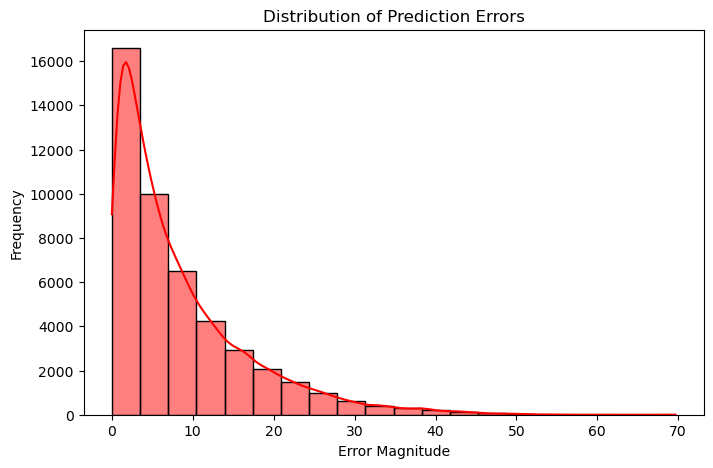

In [29]:
# Identify the top 5 mispredicted samples
errors = abs(y_test - y_pred)
error_analysis = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error': errors
}).sort_values(by='Error', ascending=False)

error_analysis.head(5)

plt.figure(figsize=(8, 5))
sns.histplot(error_analysis['Error'], bins=20, kde=True, color='red')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error Magnitude")
plt.ylabel("Frequency")
plt.show()

## **6. Conclusion**
This analysis demonstrates how audio features can predict song popularity. Future work can include:
- Adding more contextual features (e.g., artist popularity).
- Experimenting with advanced models like Gradient Boosting or Neural Networks.

/var/folders/tv/13nwqtn90nj4zswmpspw54hr0000gn/T/ipykernel_24023/124368616.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")


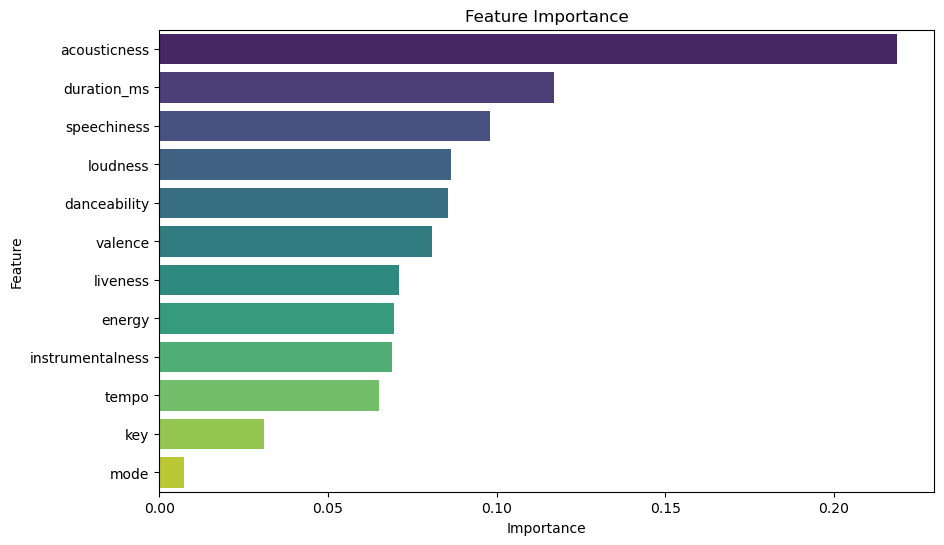

In [35]:
# Feature Importance
feature_importances = pd.DataFrame(
    {'Feature': X.columns, 'Importance': model.feature_importances_}
).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title("Feature Importance")
plt.show()